In [219]:
import pandas as pd 
from sklearn import linear_model
from sklearn import preprocessing
import math 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [220]:

# data = pd.read_csv('../data/CCFC_match_lineups_data.csv')
data = pd.read_csv('CCFC_match_lineups_data.csv')
data.head()
list(data.columns.values)

['Unnamed: 0',
 'Opposition',
 'Distance',
 'HSR',
 'Sprint',
 'Accelerations',
 'Decelerations',
 'Jumps',
 'match_id',
 'season_name',
 'team',
 'opposition_team',
 'goals_scored',
 'goals_conceded',
 'np_xg',
 'np_xg_conceded',
 'shots',
 'shots_on_target',
 'opposition_shots',
 'opposition_shots_on_target',
 'passes',
 'opposition_passes',
 'completed_passes_into_the_box',
 'pressures',
 'pressure_regains',
 'fouls',
 'tackles',
 'yellow_cards',
 'xg_within_8_seconds_of_corner',
 'xg_conceded_within_8_seconds_of_corner',
 'shots_within_8_seconds_of_corner',
 'shots_conceded_within_8_seconds_of_corner',
 'goals_within_8_seconds_of_corner',
 'goals_conceded_within_8_seconds_of_corner',
 'xg_within_8_seconds_of_indirect_free_kick',
 'xg_conceded_within_8_seconds_of_indirect_free_kick',
 'shots_within_8_seconds_of_indirect_free_kick',
 'shots_conceded_within_8_seconds_of_indirect_free_kick',
 'goals_within_8_seconds_of_indirect_free_kick',
 'goals_conceded_within_8_seconds_of_indirect_

In [221]:
data.dropna(how='all')

,Unnamed: 0,Opposition,Distance,HSR,Sprint,Accelerations,Decelerations,Jumps,match_id,season_name,...,final_third_possession,ppda,completed_passes_and_carries_into_final_third,match_outcome,date,monte_carlo_win_prob,monte_carlo_draw_prob,monte_carlo_loss_prob,location,lineup
0,0,MK Dons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,...,NaN,NaN,NaN,NaN,2020-09-05,NaN,NaN,NaN,away,[]
1,1,Bristol,110778.68,7095.44,1315.26,280.0,405.0,50.0,3764253.0,2021,...,58.0,9.285714,43.0,lost,2020-09-12,0.2878,0.2962,0.4160,away,"[{'player_id': 3355, 'squad_role': 'Starting X..."
2,2,Gillingham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,...,NaN,NaN,NaN,NaN,2020-09-15,NaN,NaN,NaN,away,[]
3,3,QPR,111807.25,7601.80,1511.42,293.0,404.0,33.0,3764258.0,2021,...,41.0,20.833333,38.0,won,2020-09-18,0.3171,0.3402,0.3427,home,"[{'player_id': 3355, 'squad_role': 'Starting X..."
4,4,Barnsley,106883.57,7861.21,1346.77,323.0,454.0,36.0,3766905.0,2021,...,45.0,7.500000,35.0,draw,2020-09-26,0.2182,0.3205,0.4613,away,"[{'player_id': 3355, 'squad_role': 'Starting X..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,197,Manchester United,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2324,...,NaN,NaN,NaN,NaN,2024-04-21,NaN,NaN,NaN,away,[]
198,198,Hull,110919.00,7773.00,1469.00,286.0,413.0,25.0,3895799.0,2324,...,59.0,9.419355,47.0,lost,2024-04-24,0.0296,0.0947,0.8757,home,"[{'player_id': 3061, 'squad_role': 'Starting X..."
199,199,Blackburn,97988.00,6161.00,1098.00,265.0,407.0,42.0,3895882.0,2324,...,35.0,19.000000,37.0,draw,2024-04-27,0.0159,0.0806,0.9035,away,"[{'player_id': 3061, 'squad_role': 'Starting X..."
200,200,Ipswich,104052.00,6393.00,1474.00,283.0,364.0,16.0,3895872.0,2324,...,63.0,10.904762,58.0,lost,2024-04-30,0.1932,0.2693,0.5375,home,"[{'player_id': 3061, 'squad_role': 'Starting X..."


In [226]:
dist_run = "Distance" 
acc = 'Accelerations' 
shots = 'shots' 
passes = 'passes' 



np_xg = 'np_xg'
np_xg_against = 'np_xg_conceded'

# will be extended later on 
features = [ 
    acc, shots, passes, 'tackles', 'pressures', 'Sprint', 'fouls' ,'shots_on_target', 'possession' 
]

outputs = [ 
    np_xg, np_xg_against
]

feature_data = data[features]
feature_data = feature_data.dropna(how='all')


output_data = data[outputs]
output_data = output_data.dropna(how='all')

print(len(output_data) == len(feature_data))
feature_data.head()

True


,Accelerations,shots,passes,tackles,pressures,Sprint,fouls,shots_on_target,possession
1,280.0,16.0,494.0,17.0,105.0,1315.26,12.0,4.0,52.0
3,293.0,12.0,364.0,14.0,142.0,1511.42,12.0,5.0,38.0
4,323.0,11.0,515.0,19.0,149.0,1346.77,20.0,0.0,53.0
5,293.0,4.0,412.0,17.0,156.0,1194.79,14.0,1.0,37.0
6,289.0,10.0,429.0,18.0,115.0,1349.91,7.0,5.0,43.0


In [223]:
xg_goal_diff = output_data[np_xg] - output_data[np_xg_against]
Y = xg_goal_diff.to_numpy()
X = feature_data.to_numpy()
X_norm = (X - X.min()) / (X.max() - X.min())
Y_norm = (Y - Y.min()) / (Y.max() - Y.min())

# x_train = X_norm[:-10]
# x_test = X_norm[-10:]
# y_train = Y_norm[:-10]
# y_test = Y_norm[-10:]

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, shuffle=True)


[ 0.09401325 -0.92928274  0.21079053  0.0047811  -0.3746661  -0.10051952
 -0.34713316 -0.01974918 -0.52751472  0.3626736  -0.2790224   0.34255227
 -0.06561279  0.99962526 -1.52309358  1.14377194  0.40976935 -0.09869648
  0.2415317 ]
[ 0.7338639   0.25397001  0.4558868   0.79184892 -0.6057617  -0.944968
 -0.36460318 -1.07992054 -0.0603572  -0.04644453 -0.00669995 -0.97238065
  0.5012069   0.7737932  -2.8023581   0.44903461  0.42734833 -0.01506937
  0.3320794 ]
-0.09072365706650345 0.6851512162339296


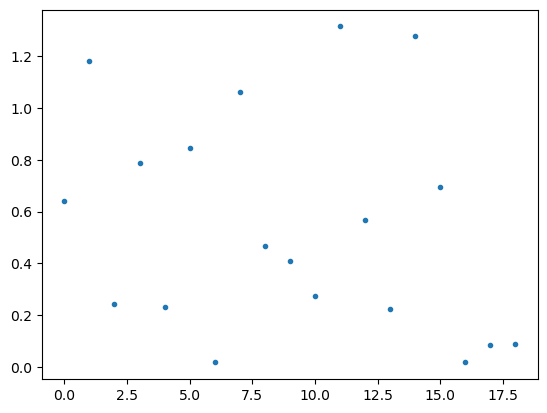

In [224]:
xg_goal_diff = output_data[np_xg] - output_data[np_xg_against]
Y = xg_goal_diff.to_numpy()
X = feature_data.to_numpy()
X_norm = (X - X.min()) / (X.max() - X.min())
Y_norm = (Y - Y.min()) / (Y.max() - Y.min())

# x_train = X_norm[:-10]
# x_test = X_norm[-10:]
# y_train = Y_norm[:-10]
# y_test = Y_norm[-10:]

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, shuffle=True)

regr = linear_model.LinearRegression()

# # Train the model using the train data
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

print(y_pred)
print(y_test)

plt.plot([i for i in range(len(y_test))], abs(y_test - y_pred), ".", label="regression")
y_diff = y_test - y_pred
print(y_diff.mean(), y_diff.std())

[ 0.13146756 -0.90908236  0.29501282  0.03214637 -0.40204437 -0.09214422
 -0.30390551  0.04070209 -0.50047985  0.26203946 -0.17021479  0.3624243
  0.02082921  0.94486802 -1.4448961   1.22997954  0.42877762 -0.12848728
  0.32498883]
[ 0.7338639   0.25397001  0.4558868   0.79184892 -0.6057617  -0.944968
 -0.36460318 -1.07992054 -0.0603572  -0.04644453 -0.00669995 -0.97238065
  0.5012069   0.7737932  -2.8023581   0.44903461  0.42734833 -0.01506937
  0.3320794 ]


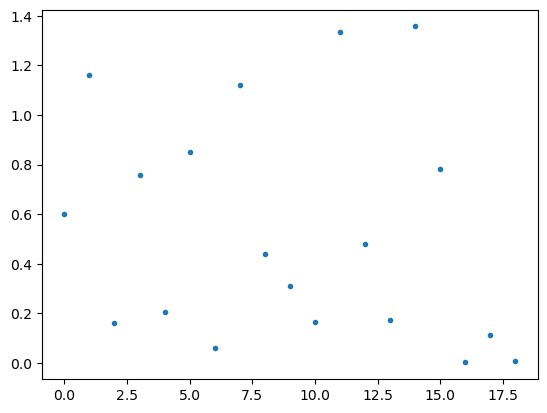

In [225]:
regr = linear_model.Lasso(alpha=0.1)

# # Train the model using the train data
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

print(y_pred)
print(y_test)

plt.plot([i for i in range(len(y_test))], abs(y_test - y_pred), ".", label="regression")